In [3]:
import torch
import timeit
from tqdm import tqdm

print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
1


In [4]:
x = torch.rand(5,12)
x

tensor([[0.8178, 0.8541, 0.6020, 0.1154, 0.8568, 0.8392, 0.9106, 0.1031, 0.5138,
         0.0461, 0.6495, 0.6983],
        [0.9357, 0.5840, 0.2768, 0.7350, 0.9420, 0.6405, 0.2056, 0.6910, 0.8445,
         0.3656, 0.3740, 0.5510],
        [0.1837, 0.5227, 0.3460, 0.4376, 0.4678, 0.8006, 0.4102, 0.9003, 0.4635,
         0.1984, 0.6417, 0.8452],
        [0.4423, 0.3671, 0.5857, 0.3587, 0.5716, 0.4095, 0.7892, 0.1996, 0.8455,
         0.9071, 0.1968, 0.3214],
        [0.0188, 0.2018, 0.9508, 0.0759, 0.4029, 0.4647, 0.1560, 0.2981, 0.9520,
         0.5810, 0.0904, 0.6542]])

In [11]:
basis = torch.rand(11,32)
basis

tensor([[0.9933, 0.9717, 0.5730, 0.5917, 0.3251, 0.6735, 0.4386, 0.5408, 0.3750,
         0.2545, 0.8474, 0.8967, 0.4726, 0.4764, 0.2821, 0.6402, 0.8645, 0.6735,
         0.9839, 0.8118, 0.7733, 0.5014, 0.6670, 0.9773, 0.0770, 0.6177, 0.9143,
         0.5452, 0.5298, 0.4251, 0.0185, 0.3565],
        [0.3126, 0.6989, 0.3243, 0.2589, 0.2065, 0.4527, 0.9618, 0.1636, 0.7455,
         0.9963, 0.8082, 0.7493, 0.0432, 0.9400, 0.9288, 0.5727, 0.4913, 0.9361,
         0.2133, 0.4227, 0.9705, 0.7292, 0.4016, 0.8903, 0.8845, 0.7411, 0.7023,
         0.7825, 0.9645, 0.1237, 0.9941, 0.2664],
        [0.1193, 0.7523, 0.8326, 0.3851, 0.9601, 0.0876, 0.1952, 0.2428, 0.9631,
         0.8531, 0.6212, 0.6740, 0.2512, 0.0275, 0.2029, 0.2573, 0.4192, 0.9190,
         0.9991, 0.5503, 0.8558, 0.3232, 0.4286, 0.2505, 0.9336, 0.5504, 0.5793,
         0.5182, 0.6030, 0.0540, 0.5903, 0.6542],
        [0.6937, 0.1951, 0.9227, 0.6017, 0.3152, 0.9792, 0.4567, 0.8795, 0.0389,
         0.6174, 0.3929, 0.7130, 0.2806,

In [12]:
mult = x[:,1:] @ basis


mult

tensor([[3.8694, 3.0114, 3.6348, 2.8853, 2.2559, 3.5022, 3.0669, 1.9112, 3.0379,
         3.0560, 4.1689, 3.2575, 2.3443, 2.7955, 2.4246, 2.7356, 3.1812, 3.9673,
         2.6852, 2.8321, 3.6879, 4.6590, 3.2395, 3.9330, 2.7037, 2.3777, 4.9079,
         3.0522, 3.4761, 3.4342, 2.5238, 3.4998],
        [3.3659, 2.6601, 3.4725, 2.2428, 2.8047, 2.8717, 2.5996, 2.1648, 3.4568,
         3.1301, 3.6572, 3.7547, 2.4737, 2.5998, 2.2802, 2.2826, 3.3717, 3.5719,
         2.5283, 2.8297, 3.8802, 4.1010, 2.5293, 3.6161, 3.2390, 2.2486, 4.6343,
         3.3271, 3.1026, 3.0199, 2.8616, 3.2907],
        [3.2401, 2.7680, 2.9642, 2.1646, 2.2932, 2.6919, 2.9631, 1.6815, 3.6395,
         2.7930, 3.6927, 3.3996, 2.2631, 3.0817, 2.2053, 2.6761, 3.1464, 3.9091,
         2.2259, 3.0119, 3.6362, 4.1999, 2.5427, 3.3283, 2.9162, 2.2765, 4.6698,
         3.0443, 2.7648, 3.3825, 2.8054, 2.8938],
        [2.9853, 2.0897, 3.5005, 2.2973, 2.5697, 2.3761, 2.3845, 1.8500, 2.7001,
         3.1599, 3.5241, 3.0035, 2.0727,

In [18]:
torch.cat([x[:,0].unsqueeze(1), mult], dim=1)

tensor([[0.8178, 3.8694, 3.0114, 3.6348, 2.8853, 2.2559, 3.5022, 3.0669, 1.9112,
         3.0379, 3.0560, 4.1689, 3.2575, 2.3443, 2.7955, 2.4246, 2.7356, 3.1812,
         3.9673, 2.6852, 2.8321, 3.6879, 4.6590, 3.2395, 3.9330, 2.7037, 2.3777,
         4.9079, 3.0522, 3.4761, 3.4342, 2.5238, 3.4998],
        [0.9357, 3.3659, 2.6601, 3.4725, 2.2428, 2.8047, 2.8717, 2.5996, 2.1648,
         3.4568, 3.1301, 3.6572, 3.7547, 2.4737, 2.5998, 2.2802, 2.2826, 3.3717,
         3.5719, 2.5283, 2.8297, 3.8802, 4.1010, 2.5293, 3.6161, 3.2390, 2.2486,
         4.6343, 3.3271, 3.1026, 3.0199, 2.8616, 3.2907],
        [0.1837, 3.2401, 2.7680, 2.9642, 2.1646, 2.2932, 2.6919, 2.9631, 1.6815,
         3.6395, 2.7930, 3.6927, 3.3996, 2.2631, 3.0817, 2.2053, 2.6761, 3.1464,
         3.9091, 2.2259, 3.0119, 3.6362, 4.1999, 2.5427, 3.3283, 2.9162, 2.2765,
         4.6698, 3.0443, 2.7648, 3.3825, 2.8054, 2.8938],
        [0.4423, 2.9853, 2.0897, 3.5005, 2.2973, 2.5697, 2.3761, 2.3845, 1.8500,
         2.7001,

In [1]:
assert False

AssertionError: 

In [31]:
def mult():
	return A @ B

In [32]:

device = torch.device("cuda:0")
A = torch.rand(256, 256).to(device)
B = torch.rand(256, 256).to(device)

timeit.timeit(mult, number=100000)

0.8126826150000852

In [33]:
device = torch.device("cpu")
A = torch.rand(256, 256).to(device)
B = torch.rand(256, 256).to(device)

timeit.timeit(mult, number=100000)

4.247071219000645

100%|██████████| 511/511 [00:52<00:00,  9.72it/s]


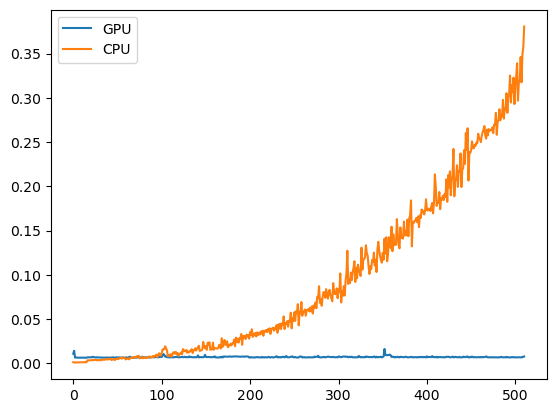

In [ ]:
gpu_times = []
cpu_times = []

for dimension in tqdm(range(1, 512)):
	device = torch.device("cuda:0")
	A = torch.rand(dimension, dimension).to(device)
	B = torch.rand(dimension, dimension).to(device)
	gpu_times.append(timeit.timeit(mult, number=1000))

	device = torch.device("cpu")
	A = torch.rand(dimension, dimension).to(device)
	B = torch.rand(dimension, dimension).to(device)
	cpu_times.append(timeit.timeit(mult, number=1000))

import matplotlib.pyplot as plt


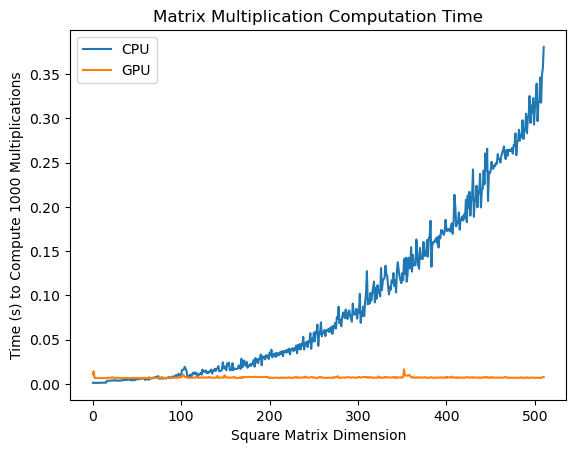

In [37]:
plt.plot(cpu_times, label="CPU")
plt.plot(gpu_times, label="GPU")

plt.title("Matrix Multiplication Computation Time")
plt.xlabel("Square Matrix Dimension")
plt.ylabel("Time (s) to Compute 1000 Multiplications")
plt.legend()
plt.show()